In [17]:

import tensorflow

from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

In [18]:
results={
    0:'cat',
    1:'dog'
}
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [19]:
model = tensorflow.keras.models.load_model("models/1")

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [21]:
def infer(file):
    from PIL import Image

    im=Image.open(img_file)
    im=im.resize(Image_Size)
    im=np.expand_dims(im,axis=0)
    im=np.array(im)
    im=im/255

    pred=model.predict([im])[0]
    return (results[np.argmax(pred)])

In [22]:
!wget -O sample.jpg https://placekitten.com/200/138 

--2021-04-10 20:08:46--  https://placekitten.com/200/138
Resolving placekitten.com (placekitten.com)... 172.67.180.80, 104.21.48.66, 2606:4700:3035::ac43:b450, ...
Connecting to placekitten.com (placekitten.com)|172.67.180.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg              [ <=>                ]   4.23K  --.-KB/s    in 0s      

2021-04-10 20:08:46 (112 MB/s) - ‘sample.jpg’ saved [4335]



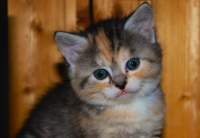

In [23]:
img_file="sample.jpg"
Image(img_file) 

In [24]:
infer(img_file)

'cat'

In [25]:
!wget -O sample1.jpg https://image.freepik.com/free-photo/adorable-brown-white-basenji-dog-smiling-giving-high-five-isolated-white_346278-1657.jpg

--2021-04-10 20:08:49--  https://image.freepik.com/free-photo/adorable-brown-white-basenji-dog-smiling-giving-high-five-isolated-white_346278-1657.jpg
Resolving image.freepik.com (image.freepik.com)... 104.120.158.71, 2600:140f:6:78a::30ec, 2600:140f:6:790::30ec
Connecting to image.freepik.com (image.freepik.com)|104.120.158.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45263 (44K) [image/jpeg]
Saving to: ‘sample1.jpg’

sample1.jpg         100%[===================>]  44.20K  --.-KB/s    in 0.002s  

2021-04-10 20:08:49 (23.0 MB/s) - ‘sample1.jpg’ saved [45263/45263]



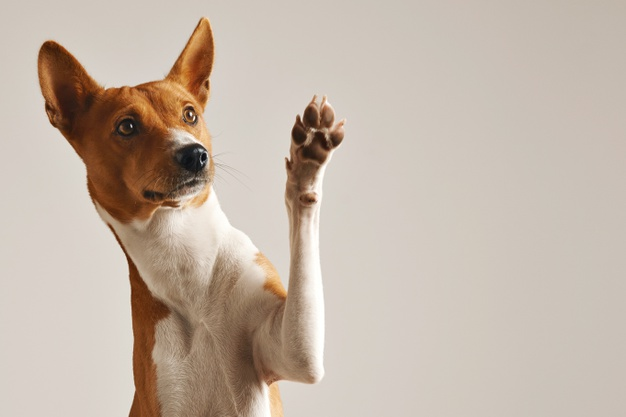

In [26]:
img_file="sample1.jpg"
Image(img_file)

In [27]:
print(infer(img_file))

dog
